In [1]:
!pip install gym matplotlib stable_baselines3 gym_anytrading

/home/vardan/Desktop/finSearch/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/home/vardan/Desktop/finSearch/lib/python3.9/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/vardan/Desktop/finSearch/lib/python3.9/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  dep

Using cpu device
info {'total_reward': 495.5499999999993, 'total_profit': 0.791655624242431, 'position': 0}


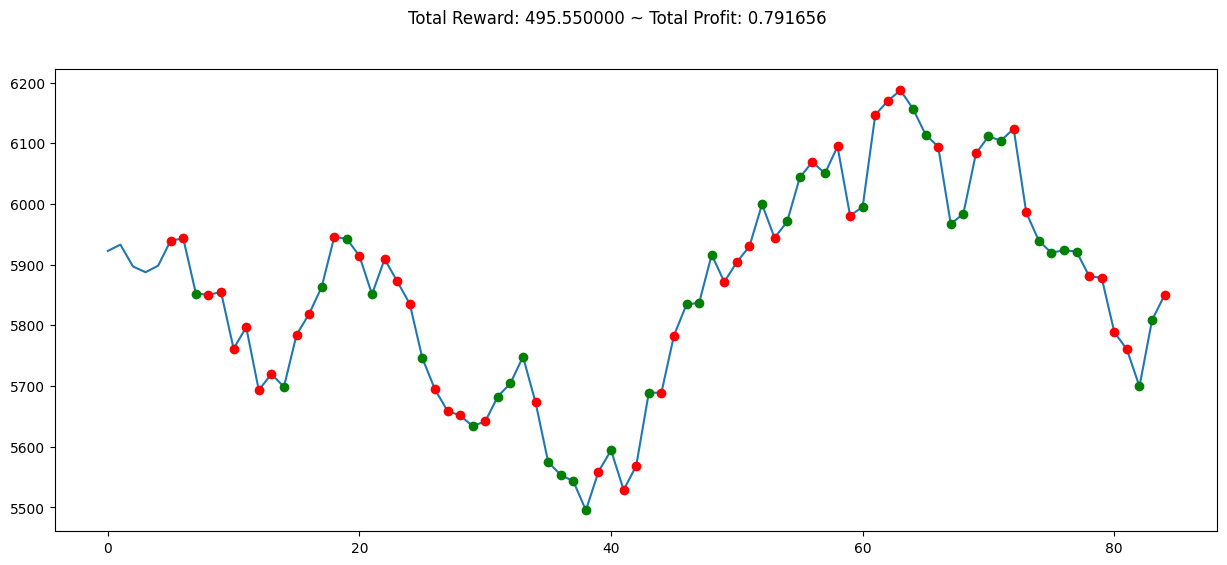

In [2]:
# Install the required libraries
# Make sure you have the latest versions of stable-baselines3, gym, and pandas installed
# !pip install stable-baselines3[extra] gym pandas

# Import the required libraries
import gym
import gym_anytrading

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv

# Load your data and preprocess it
df = pd.read_csv('./TEST/Untitled spreadsheet - NIFTY50.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define your custom gym environment function
def env_maker():
    return gym.make('stocks-v0', df=df, frame_bound=(5, 1000), window_size=5)

# Create the environment using make_vec_env
env = DummyVecEnv([env_maker])

# Train the A2C model
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100)

# Test the trained model on a different time frame
test_env = gym.make('stocks-v0', df=df, frame_bound=(20, 100), window_size=5)
obs = test_env.reset()

while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = test_env.step(action)
    if done:
        print("info", info)
        break

# Plot the results
plt.figure(figsize=(15, 6))
plt.cla()
test_env.render_all()
plt.show()


In [3]:
env.action_space
env.observation_space

Box(-inf, inf, (5, 2), float64)